In [2]:
# ==============================
# Gerekli Kütüphanelerin İçe Aktarılması
# ==============================

import pandas as pd              # Veri okuma ve DataFrame işlemleri
import numpy as np               # Sayısal işlemler
import matplotlib.pyplot as plt  # Grafik çizimi
import seaborn as sns            # İstatistiksel görselleştirme
import warnings                  # Uyarı mesajları kontrolü

warnings.filterwarnings("ignore")  # Uyarıları ekranda gösterme

# ==============================
# Görselleştirme Ayarları
# ==============================

plt.rcParams["figure.figsize"] = (10, 5)  # Grafik boyutu
plt.rcParams["axes.grid"] = True          # Grafiklerde ızgara çizgileri

# ==============================
# Pandas Görüntü Ayarları
# ==============================

pd.set_option("display.float_format", "{:,.4f}".format)  # Ondalıklı sayıları düzenli göster

# Verilerin Yüklenmesi, İşlenmesi ve Birleştirilmesi

## BDDK VERİLERİ OKUMA & NPL HESABI

In [3]:
# ==============================
# Kredi Verisinin Yüklenmesi
# ==============================

df_kredi = pd.read_excel("krediler.xlsx")  # Excel dosyasını DataFrame olarak oku

df_kredi.head()  # İlk 5 satırı görüntüle

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Bilanço - Krediler (milyon TL)-TP,Bilanço - Krediler (milyon TL)-YP,Bilanço - Krediler (milyon TL)-Toplam
0,Sektör,2025,10,"13,457,014.7460","8,134,335.3950","21,591,350.1410"
1,Sektör,2025,9,"13,153,174.5830","8,090,362.7910","21,243,537.3740"
2,Sektör,2025,8,"12,731,825.5470","7,899,532.1210","20,631,357.6680"
3,Sektör,2025,7,"12,388,145.9160","7,670,486.8340","20,058,632.7500"
4,Sektör,2025,6,"11,982,560.9310","7,572,902.1240","19,555,463.0550"


In [4]:
# ==============================
# Sütun İsimlerinin Kontrol Edilmesi
# ==============================

df_kredi.columns  # Veri setindeki tüm sütun adlarını listele

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2',
       'Bilanço - Krediler (milyon TL)-TP',
       'Bilanço - Krediler (milyon TL)-YP',
       'Bilanço - Krediler (milyon TL)-Toplam'],
      dtype='object')

In [5]:
# ==============================
# Gerekli Sütunların Seçilmesi ve Yeniden Adlandırılması
# ==============================

df_kredi = df_kredi[[
    "Unnamed: 1",   # Yıl bilgisi
    "Unnamed: 2",   # Ay bilgisi
    "Bilanço - Krediler (milyon TL)-Toplam"  # Toplam kredi tutarı
]].rename(columns={
    "Unnamed: 1": "Yil",            # Yıl sütunu
    "Unnamed: 2": "Ay",             # Ay sütunu
    "Bilanço - Krediler (milyon TL)-Toplam": "Toplam_Krediler"  # Daha anlaşılır isim
})

df_kredi.head()  # İlk 5 gözlemi göster

,Yil,Ay,Toplam_Krediler
0,2025,10,"21,591,350.1410"
1,2025,9,"21,243,537.3740"
2,2025,8,"20,631,357.6680"
3,2025,7,"20,058,632.7500"
4,2025,6,"19,555,463.0550"


In [6]:
# ==============================
# Tarih Değişkeninin Oluşturulması ve Sıralama
# ==============================

df_kredi["Tarih"] = pd.to_datetime(
    df_kredi["Yil"].astype(str) + "-" +   # Yıl bilgisi
    df_kredi["Ay"].astype(str) + "-01"    # Ay bilgisi (ayın ilk günü)
)

df_kredi = df_kredi.sort_values("Tarih")  # Tarihe göre sırala

df_kredi.head()  # İlk 5 gözlemi göster

,Yil,Ay,Toplam_Krediler,Tarih
153,2013,1,"799,119.7900",2013-01-01
152,2013,2,"815,272.3280",2013-02-01
151,2013,3,"833,556.8740",2013-03-01
150,2013,4,"848,261.0610",2013-04-01
149,2013,5,"890,203.4030",2013-05-01


In [7]:
# ==============================
# Son Kullanılacak Sütunların Seçilmesi
# ==============================

df_kredi = df_kredi[[
    "Tarih",            # Zaman değişkeni
    "Toplam_Krediler"   # Toplam kredi tutarı
]].copy()               # Orijinal veriyle bağını kopar

df_kredi.tail()  # Son 5 gözlemi göster

,Tarih,Toplam_Krediler
4,2025-06-01,"19,555,463.0550"
3,2025-07-01,"20,058,632.7500"
2,2025-08-01,"20,631,357.6680"
1,2025-09-01,"21,243,537.3740"
0,2025-10-01,"21,591,350.1410"


In [8]:
# ==============================
# Takipteki Krediler (NPL) Verisinin Yüklenmesi
# ==============================

df_npl = pd.read_excel("toplamtakiptekialacaklar.xlsx")  # Takipteki krediler dosyasını oku

df_npl.head()  # İlk 5 gözlemi göster

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Bilanço - Takipteki Alacaklar (milyon TL)-TP,Bilanço - Takipteki Alacaklar (milyon TL)-YP,Bilanço - Takipteki Alacaklar (milyon TL)-Toplam
0,Sektör,2025,10,"526,768.3100","7,039.8380","533,808.1480"
1,Sektör,2025,9,"495,254.8280","7,569.8700","502,824.6980"
2,Sektör,2025,8,"466,676.0890","6,225.4740","472,901.5630"
3,Sektör,2025,7,"446,706.9810","5,703.0100","452,409.9910"
4,Sektör,2025,6,"421,873.7970","5,358.7270","427,232.5240"


In [9]:
# ==============================
# Takipteki Krediler Veri Setinde Sütun İsimlerinin Kontrolü
# ==============================

df_npl.columns  # Veri setindeki tüm sütun adlarını listele

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2',
       'Bilanço - Takipteki Alacaklar (milyon TL)-TP',
       'Bilanço - Takipteki Alacaklar (milyon TL)-YP',
       'Bilanço - Takipteki Alacaklar (milyon TL)-Toplam'],
      dtype='object')

In [10]:
# ==============================
# Takipteki Alacaklar İçin Gerekli Sütunların Seçilmesi
# ==============================

df_npl = df_npl[[
    "Unnamed: 1",          # Yıl bilgisi
    "Unnamed: 2",          # Ay bilgisi
    df_npl.columns[-1]     # Toplam takipteki alacaklar sütunu
]].rename(columns={
    "Unnamed: 1": "Yil",                    # Yıl sütunu
    "Unnamed: 2": "Ay",                     # Ay sütunu
    df_npl.columns[-1]: "Takipteki_Alacaklar"  # Daha anlaşılır isim
})

df_npl.head()  # İlk 5 gözlemi göster

,Yil,Ay,Takipteki_Alacaklar
0,2025,10,"533,808.1480"
1,2025,9,"502,824.6980"
2,2025,8,"472,901.5630"
3,2025,7,"452,409.9910"
4,2025,6,"427,232.5240"


In [11]:
# ==============================
# Takipteki Alacaklar İçin Tarih Değişkeninin Oluşturulması
# ==============================

df_npl["Tarih"] = pd.to_datetime(
    df_npl["Yil"].astype(str) + "-" +   # Yıl bilgisi
    df_npl["Ay"].astype(str) + "-01"    # Ay bilgisi (ayın ilk günü)
)

df_npl = df_npl.sort_values("Tarih")  # Tarihe göre sırala

# ==============================
# Son Kullanılacak Sütunların Seçilmesi
# ==============================

df_npl = df_npl[[
    "Tarih",                # Zaman değişkeni
    "Takipteki_Alacaklar"   # Takipteki kredi tutarı
]]

df_npl.tail()  # Son 5 gözlemi göster

,Tarih,Takipteki_Alacaklar
4,2025-06-01,"427,232.5240"
3,2025-07-01,"452,409.9910"
2,2025-08-01,"472,901.5630"
1,2025-09-01,"502,824.6980"
0,2025-10-01,"533,808.1480"


In [12]:
# ==============================
# Toplam Krediler ve Takipteki Alacakların Birleştirilmesi
# ==============================

df_bddk = pd.merge(
    df_kredi,   # Toplam krediler veri seti
    df_npl,     # Takipteki alacaklar veri seti
    on="Tarih", # Ortak tarih değişkeni
    how="inner" # Her iki veri setinde de bulunan tarihler
)

df_bddk.tail()  # Son 5 gözlemi göster

,Tarih,Toplam_Krediler,Takipteki_Alacaklar
149,2025-06-01,"19,555,463.0550","427,232.5240"
150,2025-07-01,"20,058,632.7500","452,409.9910"
151,2025-08-01,"20,631,357.6680","472,901.5630"
152,2025-09-01,"21,243,537.3740","502,824.6980"
153,2025-10-01,"21,591,350.1410","533,808.1480"


In [13]:
# ==============================
# NPL Oranının ve Logaritmik Dönüşümünün Hesaplanması
# ==============================

df_bddk["NPL_Ratio"] = (
    df_bddk["Takipteki_Alacaklar"] /
    df_bddk["Toplam_Krediler"]      # NPL / Toplam brüt krediler
)

df_bddk["log_NPL"] = np.log(df_bddk["NPL_Ratio"])  # NPL oranının logu

df_bddk[["Tarih", "NPL_Ratio", "log_NPL"]].tail()  # Son 5 gözlemi göster

,Tarih,NPL_Ratio,log_NPL
149,2025-06-01,0.0218,-3.8237
150,2025-07-01,0.0226,-3.7918
151,2025-08-01,0.0229,-3.7757
152,2025-09-01,0.0237,-3.7436
153,2025-10-01,0.0247,-3.7000


In [14]:
# ==============================
# Tanımlayıcı İstatistiklerin İncelenmesi
# ==============================

df_bddk.describe()  # Sayısal değişkenler için özet istatistikleri göster

,Toplam_Krediler,Takipteki_Alacaklar,NPL_Ratio,log_NPL
count,154.0000,154.0000,154.0000,154.0000
mean,"5,083,483.8529","127,509.6854",0.0311,-3.5210
std,"5,326,783.5328","101,283.0058",0.0096,0.3209
min,"799,119.7900","24,234.0550",0.0153,-4.1799
25%,"1,512,432.8835","51,591.0058",0.0248,-3.6982
50%,"2,543,900.6800","113,821.2535",0.0303,-3.4962
75%,"6,623,780.2910","161,524.4388",0.0348,-3.3595
max,"21,591,350.1410","533,808.1480",0.0568,-2.8688


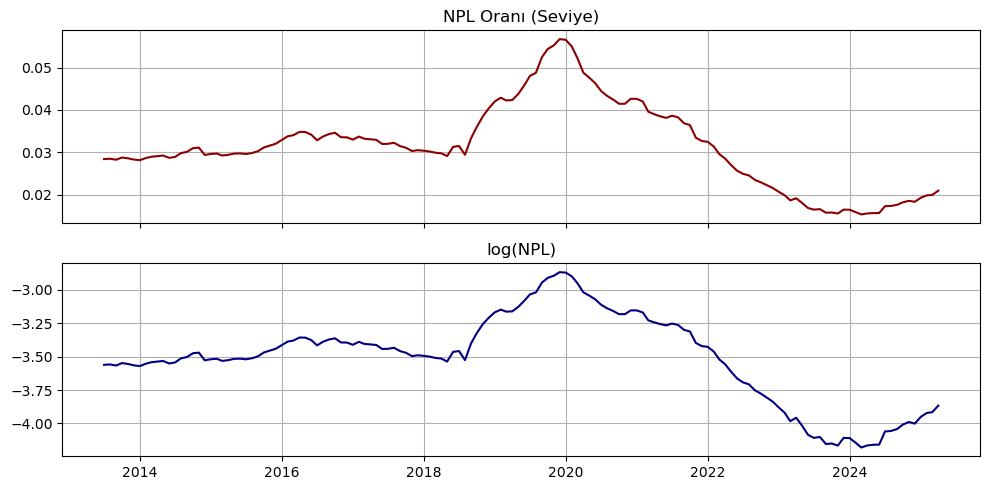

In [43]:
# ==============================
# NPL Oranının Seviye ve Logaritmik Gösteriminin Görselleştirilmesi
# ==============================

fig, ax = plt.subplots(2, 1, sharex=True)  # Alt alta iki grafik oluştur

ax[0].plot(df_model["Tarih"], df_model["NPL_Ratio"], color="darkred")
ax[0].set_title("NPL Oranı (Seviye)")      # Ham NPL oranı

ax[1].plot(df_model["Tarih"], df_model["log_NPL"], color="navy")
ax[1].set_title("log(NPL)")               # Logaritmik NPL oranı

plt.tight_layout()  # Grafikler arası boşlukları düzenle
plt.show()          # Grafikleri göster


## EVDS VERİLERİ OKUMA & MERGE

In [ ]:
# ==============================
# EVDS API Bağlantısının Oluşturulması
# ==============================

from evds import evdsAPI  # TCMB EVDS API kütüphanesi

API_KEY = "buraya kendi API anahtarınızı giriniz"    # EVDS API anahtarı
evds = evdsAPI(API_KEY)  # API bağlantısını başlat

In [16]:
# ==============================
# EVDS Üzerinden Çekilecek Makroekonomik Seri Kodları
# ==============================

series_dict = {
    "X1_IPI":        "TP.TSANAYMT2021.Y1",  # Sanayi Üretim Endeksi (SA)
    "X2_KKO":        "TP.KKO.MA",           # Kapasite Kullanım Oranı (MA)
    "X3_CPI":        "TP.FG.J0",            # TÜFE (Manşet)
    "X4_PPI":        "TP.TUFE1YI.T1",       # Yİ-ÜFE
    "X5_FUND":       "TP.APIFON4",          # Ağırlıklı Ortalama Fonlama Maliyeti
    "X6_LOAN_RATE":  "TP.KTFTUK01",         # Tüketici Kredisi Faiz Oranı
    "X8_UNEMP":      "TP.TIG08",            # İşsizlik Oranı (SA)
    "X9_CONF":       "TP.TG2.Y01"            # Tüketici Güven Endeksi
}

In [17]:
# ==============================
# Analiz Döneminin Tanımlanması
# ==============================

start_date = "01-01-2013"  # Analizin başlangıç tarihi
end_date   = "01-10-2025"  # Analizin bitiş tarihi

In [18]:
# ==============================
# EVDS Üzerinden Makroekonomik Verilerin Çekilmesi
# ==============================

df_list = []  # Her bir seri için geçici DataFrame'leri tutacak liste

for var_name, series_code in series_dict.items():
    
    tmp = evds.get_data(
        series=[series_code],   # EVDS seri kodu
        startdate=start_date,   # Başlangıç tarihi
        enddate=end_date,       # Bitiş tarihi
        frequency=5             # Aylık frekans
    )
    
    tmp = tmp.iloc[:, :2]       # Tarih ve değer sütunlarını al
    tmp.columns = ["Tarih", var_name]  # Sütunları yeniden adlandır
    
    tmp["Tarih"] = pd.to_datetime(tmp["Tarih"])  # Tarihi datetime formatına çevir
    df_list.append(tmp)          # Listeye ekle

In [19]:
# ==============================
# EVDS Makroekonomik Serilerinin Tek Veri Setinde Birleştirilmesi
# ==============================

df_evds = df_list[0]  # İlk makro seriyi başlangıç olarak al

for df in df_list[1:]:
    df_evds = df_evds.merge(
        df,
        on="Tarih",      # Ortak tarih değişkeni
        how="inner"      # Tüm serilerde ortak olan aylar
    )

df_evds = df_evds.sort_values("Tarih").reset_index(drop=True)  # Tarihe göre sırala

df_evds.head()  # İlk 5 gözlemi göster

,Tarih,X1_IPI,X2_KKO,X3_CPI,X4_PPI,X5_FUND,X6_LOAN_RATE,X8_UNEMP,X9_CONF
0,2013-01-01,62.7657,75.7000,216.7400,206.9124,5.6000,25.5200,8.6000,91.5171
1,2013-02-01,64.1455,74.6000,217.3900,206.6450,5.5300,23.7200,8.6000,91.7597
2,2013-03-01,63.9647,75.7000,218.8300,208.3288,5.9600,22.5240,8.6000,92.0565
3,2013-04-01,64.4864,75.6000,219.7500,207.2690,5.1700,22.3900,8.8000,92.7070
4,2013-05-01,64.6186,76.8000,220.0700,209.3391,4.5200,19.2060,8.8000,95.5260


In [20]:
# ==============================
# EVDS Üzerinden Günlük USD/TL Kur Verisinin Çekilmesi
# ==============================

df_usd_daily = evds.get_data(
    series=["TP.DK.USD.A.YTL"],  # USD/TL günlük kur serisi
    startdate=start_date,       # Başlangıç tarihi
    enddate=end_date,           # Bitiş tarihi
    frequency=1                 # Günlük frekans
)

df_usd_daily = df_usd_daily.iloc[:, :2]           # Tarih ve değer sütunlarını al
df_usd_daily.columns = ["Tarih", "X7_USDTRY"]     # Sütunları yeniden adlandır

df_usd_daily["Tarih"] = pd.to_datetime(df_usd_daily["Tarih"])      # Tarih formatı
df_usd_daily["X7_USDTRY"] = df_usd_daily["X7_USDTRY"].astype(float)  # Sayısal form

df_usd_daily.head()  # İlk 5 gözlemi göster

,Tarih,X7_USDTRY
0,2013-01-01,NaN
1,2013-02-01,1.7776
2,2013-03-01,1.7708
3,2013-04-01,1.7729
4,2013-05-01,NaN


In [22]:
# ==============================
# Günlük USD/TL Kur Verisinin Aylık Frekansa Dönüştürülmesi
# ==============================

df_usd_monthly = (
    df_usd_daily
    .set_index("Tarih")   # Tarihi indeks yap
    .resample("M")        # Aylık frekansa çevir
    .mean()               # Aylık ortalama al
    .reset_index()        # İndeksi tekrar sütuna çevir
)

df_usd_monthly.head()  # İlk 5 gözlemi göster

,Tarih,X7_USDTRY
0,2013-01-31,1.8031
1,2013-02-28,1.8328
2,2013-03-31,1.8480
3,2013-04-30,1.8474
4,2013-05-31,1.8659


In [23]:
# ==============================
# Aylık USD/TL Kurunda Tarih Formatının Standartlaştırılması
# ==============================

df_usd_monthly["Tarih"] = (
    df_usd_monthly["Tarih"]
    .dt.to_period("M")      # Tarihi aylık dönem formatına çevir
    .dt.to_timestamp()     # Ayın ilk gününe dönüştür
)

df_usd_monthly.head()  # İlk 5 gözlemi göster

,Tarih,X7_USDTRY
0,2013-01-01,1.8031
1,2013-02-01,1.8328
2,2013-03-01,1.8480
3,2013-04-01,1.8474
4,2013-05-01,1.8659


In [24]:
# ==============================
# USD/TL Aylık Kur Verisinin EVDS Veri Setine Eklenmesi
# ==============================

df_evds = df_evds.merge(
    df_usd_monthly,  # Aylık USD/TL kuru
    on="Tarih",      # Ortak tarih değişkeni
    how="inner"      # Ortak aylara göre birleştir
)

df_evds.head()  # İlk 5 gözlemi göster

,Tarih,X1_IPI,X2_KKO,X3_CPI,X4_PPI,X5_FUND,X6_LOAN_RATE,X8_UNEMP,X9_CONF,X7_USDTRY
0,2013-01-01,62.7657,75.7000,216.7400,206.9124,5.6000,25.5200,8.6000,91.5171,1.8031
1,2013-02-01,64.1455,74.6000,217.3900,206.6450,5.5300,23.7200,8.6000,91.7597,1.8328
2,2013-03-01,63.9647,75.7000,218.8300,208.3288,5.9600,22.5240,8.6000,92.0565,1.8480
3,2013-04-01,64.4864,75.6000,219.7500,207.2690,5.1700,22.3900,8.8000,92.7070,1.8474
4,2013-05-01,64.6186,76.8000,220.0700,209.3391,4.5200,19.2060,8.8000,95.5260,1.8659


In [25]:
# ==============================
# Türkiye 5Y CDS Verisinin Yüklenmesi ve Düzenlenmesi
# ==============================

import pandas as pd

start_date = pd.to_datetime("2013-01-01")  # Analiz başlangıç tarihi
end_date   = pd.to_datetime("2025-10-01")  # Analiz bitiş tarihi

df_cds = pd.read_csv("TRGV5YUSAC=RGenelBakis.csv")  # CDS verisini oku

# ==============================
# Gerekli Sütunların Seçilmesi
# ==============================

df_cds = df_cds[["Tarih", "Şimdi"]].copy()  # Tarih ve CDS değeri

# ==============================
# Tarih Değişkeninin Düzenlenmesi
# ==============================

df_cds["Tarih"] = pd.to_datetime(
    df_cds["Tarih"],
    format="%d.%m.%Y",   # Gün.Ay.Yıl formatı
    errors="coerce"      # Hatalı değerleri NaT yap
)

# ==============================
# CDS Değerinin Sayısal Hale Getirilmesi
# ==============================

df_cds["Şimdi"] = (
    df_cds["Şimdi"]
    .astype(str)
    .str.replace(",", ".")  # Ondalık ayıracı düzelt
    .astype(float)
)

# ==============================
# Aylık Tarih Formatına Dönüştürme
# ==============================

df_cds["Tarih"] = (
    df_cds["Tarih"]
    .dt.to_period("M")     # Aylık dönem
    .dt.to_timestamp()    # Ayın ilk günü
)

df_cds = df_cds.sort_values("Tarih")  # Tarihe göre sırala

# ==============================
# Analiz Tarih Aralığının Filtrelenmesi
# ==============================

df_cds = df_cds[
    (df_cds["Tarih"] >= start_date) &
    (df_cds["Tarih"] <= end_date)
].reset_index(drop=True)

# ==============================
# Değişken İsminin Standartlaştırılması
# ==============================

df_cds = df_cds.rename(columns={"Şimdi": "X10_CDS"})  # CDS değişkeni

df_cds.tail()  # Son 5 gözlemi göster

,Tarih,X10_CDS
149,2025-06-01,284.3600
150,2025-07-01,277.6900
151,2025-08-01,259.9500
152,2025-09-01,256.1800
153,2025-10-01,244.6500


In [26]:
# ==============================
# Tüm Veri Setlerinde Tarih Formatının Eşitlenmesi
# ==============================

for df in [df_bddk, df_evds, df_cds]:
    df["Tarih"] = pd.to_datetime(df["Tarih"])  # Tarih sütununu datetime formatına çevir

In [27]:
# ==============================
# BDDK ve EVDS Veri Setlerinin Birleştirilmesi
# ==============================

df_main = pd.merge(
    df_bddk,   # NPL ve kredi verileri
    df_evds,   # Makroekonomik göstergeler
    on="Tarih",# Ortak tarih değişkeni
    how="inner"# Her iki veri setinde ortak olan aylar
)

df_main.head()  # İlk 5 gözlemi göster

,Tarih,Toplam_Krediler,Takipteki_Alacaklar,NPL_Ratio,log_NPL,X1_IPI,X2_KKO,X3_CPI,X4_PPI,X5_FUND,X6_LOAN_RATE,X8_UNEMP,X9_CONF,X7_USDTRY
0,2013-01-01,"799,119.7900","24,234.0550",0.0303,-3.4958,62.7657,75.7000,216.7400,206.9124,5.6000,25.5200,8.6000,91.5171,1.8031
1,2013-02-01,"815,272.3280","24,837.5180",0.0305,-3.4912,64.1455,74.6000,217.3900,206.6450,5.5300,23.7200,8.6000,91.7597,1.8328
2,2013-03-01,"833,556.8740","25,554.7940",0.0307,-3.4849,63.9647,75.7000,218.8300,208.3288,5.9600,22.5240,8.6000,92.0565,1.8480
3,2013-04-01,"848,261.0610","26,269.7890",0.0310,-3.4748,64.4864,75.6000,219.7500,207.2690,5.1700,22.3900,8.8000,92.7070,1.8474
4,2013-05-01,"890,203.4030","26,668.4990",0.0300,-3.5080,64.6186,76.8000,220.0700,209.3391,4.5200,19.2060,8.8000,95.5260,1.8659


In [28]:
# ==============================
# Ana Veri Setinin Genel Yapısının İncelenmesi
# ==============================

df_main.info()  # Sütun tipleri, boş değerler ve gözlem sayısını göster

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Tarih                154 non-null    datetime64[ns]
 1   Toplam_Krediler      154 non-null    float64       
 2   Takipteki_Alacaklar  154 non-null    float64       
 3   NPL_Ratio            154 non-null    float64       
 4   log_NPL              154 non-null    float64       
 5   X1_IPI               154 non-null    float64       
 6   X2_KKO               154 non-null    float64       
 7   X3_CPI               154 non-null    float64       
 8   X4_PPI               154 non-null    float64       
 9   X5_FUND              154 non-null    float64       
 10  X6_LOAN_RATE         154 non-null    float64       
 11  X8_UNEMP             154 non-null    float64       
 12  X9_CONF              154 non-null    float64       
 13  X7_USDTRY            154 non-null  

In [29]:
# ==============================
# Analiz Döneminin Kontrol Edilmesi
# ==============================

df_main["Tarih"].min(), df_main["Tarih"].max()  # Veri setindeki en erken ve en geç tarih

(Timestamp('2013-01-01 00:00:00'), Timestamp('2025-10-01 00:00:00'))

In [30]:
# ==============================
# Eksik Gözlemlerin Kontrol Edilmesi
# ==============================

df_main.isna().sum()  # Her sütundaki eksik değer sayısını göster

Tarih                  0
Toplam_Krediler        0
Takipteki_Alacaklar    0
NPL_Ratio              0
log_NPL                0
X1_IPI                 0
X2_KKO                 0
X3_CPI                 0
X4_PPI                 0
X5_FUND                0
X6_LOAN_RATE           0
X8_UNEMP               0
X9_CONF                0
X7_USDTRY              0
dtype: int64

# Modelleme Aşaması

## LAG ÜRETİMİ (Lag 3 – Lag 6)

In [31]:
# ==============================
# Modelleme İçin Veri Setinin Oluşturulması
# ==============================

df_model = df_main.copy()  # Ana veri setinin modelleme için kopyası

In [32]:
# ==============================
# Modelde Kullanılacak Bağımsız Değişkenlerin Tanımlanması
# ==============================

x_vars = [
    "X1_IPI",        # Sanayi Üretim Endeksi
    "X2_KKO",        # Kapasite Kullanım Oranı
    "X3_CPI",        # TÜFE
    "X4_PPI",        # Yİ-ÜFE
    "X5_FUND",       # Ağırlıklı Ortalama Fonlama Maliyeti
    "X6_LOAN_RATE",  # Tüketici Kredisi Faiz Oranı
    "X7_USDTRY",     # USD/TL kuru
    "X8_UNEMP",      # İşsizlik Oranı
    "X9_CONF"        # Tüketici Güven Endeksi
]

In [33]:
# ==============================
# Bağımsız Değişkenler İçin Gecikmeli (Lag) Değişkenlerin Oluşturulması
# ==============================

for var in x_vars:
    df_model[f"{var}_L3"] = df_model[var].shift(3)  # 3 ay gecikmeli değer
    df_model[f"{var}_L6"] = df_model[var].shift(6)  # 6 ay gecikmeli değer

In [34]:
# ==============================
# Bağımlı Değişken İçin İleri Dönem (Lead) Değişkenlerin Oluşturulması
# ==============================

df_model["log_NPL_t3"] = df_model["log_NPL"].shift(-3)  # 3 ay sonrası log NPL
df_model["log_NPL_t6"] = df_model["log_NPL"].shift(-6)  # 6 ay sonrası log NPL

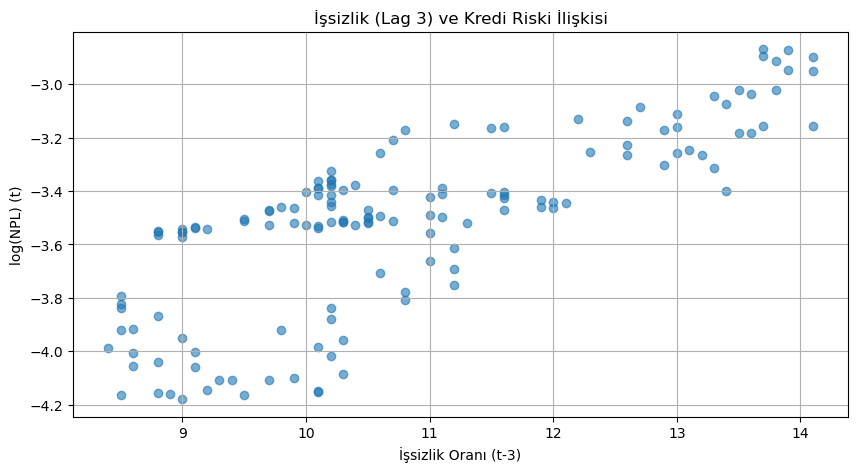

In [44]:
# ==============================
# İşsizlik Oranı (Lag 3) ile Kredi Riski Arasındaki İlişkinin İncelenmesi
# ==============================

plt.scatter(
    df_model["X8_UNEMP_L3"],   # 3 ay gecikmeli işsizlik oranı
    df_model["log_NPL_t3"],    # 3 ay sonrası log NPL
    alpha=0.6                  # Noktaların saydamlığı
)

plt.xlabel("İşsizlik Oranı (t-3)")   # X ekseni etiketi
plt.ylabel("log(NPL) (t)")           # Y ekseni etiketi
plt.title("İşsizlik (Lag 3) ve Kredi Riski İlişkisi")  # Grafik başlığı

plt.show()  # Grafiği göster

In [35]:
# ==============================
# Lag ve Lead Sonrası Eksik Gözlemlerin Kontrolü
# ==============================

df_model.isna().sum()  # Her sütundaki eksik değer sayısını göster

Tarih                  0
Toplam_Krediler        0
Takipteki_Alacaklar    0
NPL_Ratio              0
log_NPL                0
X1_IPI                 0
X2_KKO                 0
X3_CPI                 0
X4_PPI                 0
X5_FUND                0
X6_LOAN_RATE           0
X8_UNEMP               0
X9_CONF                0
X7_USDTRY              0
X1_IPI_L3              3
X1_IPI_L6              6
X2_KKO_L3              3
X2_KKO_L6              6
X3_CPI_L3              3
X3_CPI_L6              6
X4_PPI_L3              3
X4_PPI_L6              6
X5_FUND_L3             3
X5_FUND_L6             6
X6_LOAN_RATE_L3        3
X6_LOAN_RATE_L6        6
X7_USDTRY_L3           3
X7_USDTRY_L6           6
X8_UNEMP_L3            3
X8_UNEMP_L6            6
X9_CONF_L3             3
X9_CONF_L6             6
log_NPL_t3             3
log_NPL_t6             6
dtype: int64

In [36]:
# ==============================
# Eksik Gözlemlerin Temizlenmesi
# ==============================

df_model = df_model.dropna().reset_index(drop=True)  # Eksik değer içeren satırları sil

In [38]:
# ==============================
# Eksik Gözlemlerin Son Kontrolü
# ==============================

df_model.isna().sum()  # Temizleme sonrası eksik değer olup olmadığını kontrol et

Tarih                  0
Toplam_Krediler        0
Takipteki_Alacaklar    0
NPL_Ratio              0
log_NPL                0
X1_IPI                 0
X2_KKO                 0
X3_CPI                 0
X4_PPI                 0
X5_FUND                0
X6_LOAN_RATE           0
X8_UNEMP               0
X9_CONF                0
X7_USDTRY              0
X1_IPI_L3              0
X1_IPI_L6              0
X2_KKO_L3              0
X2_KKO_L6              0
X3_CPI_L3              0
X3_CPI_L6              0
X4_PPI_L3              0
X4_PPI_L6              0
X5_FUND_L3             0
X5_FUND_L6             0
X6_LOAN_RATE_L3        0
X6_LOAN_RATE_L6        0
X7_USDTRY_L3           0
X7_USDTRY_L6           0
X8_UNEMP_L3            0
X8_UNEMP_L6            0
X9_CONF_L3             0
X9_CONF_L6             0
log_NPL_t3             0
log_NPL_t6             0
dtype: int64

In [39]:
# ==============================
# Modelleme Veri Setinin Boyutunun Kontrol Edilmesi
# ==============================

df_model.shape  # (satır sayısı, sütun sayısı)

(142, 34)

In [40]:
# ==============================
# Modelleme Veri Setinin Genel Yapısının Son Kontrolü
# ==============================

df_model.info()  # Değişken türleri, boş değerler ve gözlem sayısını göster

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Tarih                142 non-null    datetime64[ns]
 1   Toplam_Krediler      142 non-null    float64       
 2   Takipteki_Alacaklar  142 non-null    float64       
 3   NPL_Ratio            142 non-null    float64       
 4   log_NPL              142 non-null    float64       
 5   X1_IPI               142 non-null    float64       
 6   X2_KKO               142 non-null    float64       
 7   X3_CPI               142 non-null    float64       
 8   X4_PPI               142 non-null    float64       
 9   X5_FUND              142 non-null    float64       
 10  X6_LOAN_RATE         142 non-null    float64       
 11  X8_UNEMP             142 non-null    float64       
 12  X9_CONF              142 non-null    float64       
 13  X7_USDTRY            142 non-null  

In [41]:
# ==============================
# Bağımlı Değişkenlerin Kontrol Edilmesi
# ==============================

df_model[[
    "Tarih",        # Zaman değişkeni
    "log_NPL",      # Mevcut dönem log NPL
    "log_NPL_t3",   # 3 ay sonrası log NPL
    "log_NPL_t6"    # 6 ay sonrası log NPL
]].head()  # İlk 5 gözlemi göster

,Tarih,log_NPL,log_NPL_t3,log_NPL_t6
0,2013-07-01,-3.5616,-3.5487,-3.5709
1,2013-08-01,-3.5587,-3.5552,-3.5533
2,2013-09-01,-3.5671,-3.5656,-3.5424
3,2013-10-01,-3.5487,-3.5709,-3.5375
4,2013-11-01,-3.5552,-3.5533,-3.5328


In [45]:
# ==============================
# Modelde Kullanılacak Gecikmeli (Lag) Bağımsız Değişkenlerin Tanımlanması
# ==============================

lag_vars = [
    "X1_IPI_L3", "X1_IPI_L6",            # Sanayi Üretim Endeksi (3 ve 6 ay gecikme)
    "X2_KKO_L3", "X2_KKO_L6",            # Kapasite Kullanım Oranı
    "X3_CPI_L3", "X3_CPI_L6",            # TÜFE
    "X4_PPI_L3", "X4_PPI_L6",            # Yİ-ÜFE
    "X5_FUND_L3", "X5_FUND_L6",          # Fonlama maliyeti
    "X6_LOAN_RATE_L3", "X6_LOAN_RATE_L6",# Tüketici kredisi faiz oranı
    "X7_USDTRY_L3", "X7_USDTRY_L6",      # USD/TL kuru
    "X8_UNEMP_L3", "X8_UNEMP_L6",        # İşsizlik oranı
    "X9_CONF_L3", "X9_CONF_L6"           # Tüketici güven endeksi
]

## KORELASYON & VIF & DEĞİŞKEN SEÇİMİ

In [46]:
# ==============================
# t+3 Dönemi İçin Korelasyon Analizi
# ==============================

corr_t3 = (
    df_model[lag_vars + ["log_NPL_t3"]]   # Lag'li değişkenler + bağımlı değişken
    .corr()["log_NPL_t3"]                 # log_NPL_t3 ile korelasyonlar
    .sort_values(key=abs, ascending=False)  # Mutlak değere göre sırala
)

corr_t3  # Korelasyon sonuçlarını göster

log_NPL_t3         1.0000
X8_UNEMP_L3        0.7697
X4_PPI_L3         -0.7571
X4_PPI_L6         -0.7392
X7_USDTRY_L3      -0.7306
X7_USDTRY_L6      -0.7140
X3_CPI_L3         -0.6947
X3_CPI_L6         -0.6762
X8_UNEMP_L6        0.6656
X1_IPI_L6         -0.5933
X1_IPI_L3         -0.5814
X6_LOAN_RATE_L3   -0.5314
X6_LOAN_RATE_L6   -0.4524
X5_FUND_L3        -0.3427
X9_CONF_L6         0.3163
X9_CONF_L3         0.2589
X5_FUND_L6        -0.2420
X2_KKO_L6         -0.2111
X2_KKO_L3         -0.2071
Name: log_NPL_t3, dtype: float64

In [47]:
# ==============================
# t+6 Dönemi İçin Korelasyon Analizi
# ==============================

corr_t6 = (
    df_model[lag_vars + ["log_NPL_t6"]]   # Lag'li değişkenler + bağımlı değişken
    .corr()["log_NPL_t6"]                 # log_NPL_t6 ile korelasyonlar
    .sort_values(key=abs, ascending=False)  # Mutlak değere göre sırala
)

corr_t6  # Korelasyon sonuçlarını göster

log_NPL_t6         1.0000
X4_PPI_L3         -0.7193
X7_USDTRY_L3      -0.7007
X4_PPI_L6         -0.6953
X7_USDTRY_L6      -0.6801
X8_UNEMP_L3        0.6783
X3_CPI_L3         -0.6481
X3_CPI_L6         -0.6282
X1_IPI_L3         -0.6168
X1_IPI_L6         -0.6134
X8_UNEMP_L6        0.5488
X6_LOAN_RATE_L3   -0.4505
X9_CONF_L6         0.3817
X6_LOAN_RATE_L6   -0.3816
X9_CONF_L3         0.3264
X5_FUND_L3        -0.2638
X2_KKO_L3         -0.2057
X5_FUND_L6        -0.1851
X2_KKO_L6         -0.1726
Name: log_NPL_t6, dtype: float64

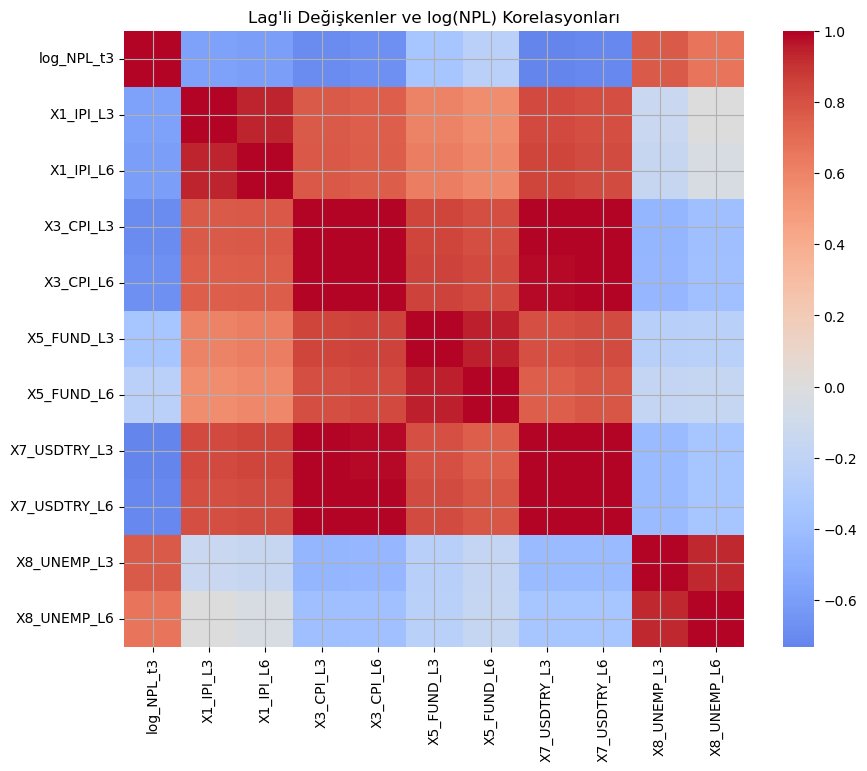

In [71]:
# ==============================
# Lag'li Değişkenler ve log(NPL) İçin Korelasyon Isı Haritası
# ==============================

corr_cols = [
    "log_NPL_t3",          # Bağımlı değişken (3 ay sonrası)
    "X1_IPI_L3", "X1_IPI_L6",       # Sanayi üretimi gecikmeleri
    "X3_CPI_L3", "X3_CPI_L6",       # Enflasyon gecikmeleri
    "X5_FUND_L3", "X5_FUND_L6",     # Fonlama maliyeti gecikmeleri
    "X7_USDTRY_L3", "X7_USDTRY_L6", # Kur gecikmeleri
    "X8_UNEMP_L3", "X8_UNEMP_L6"    # İşsizlik gecikmeleri
]

corr_matrix = df_model[corr_cols].corr()  # Korelasyon matrisi

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",   # Pozitif-negatif ilişkileri vurgula
    center=0           # 0 etrafında dengeli renk dağılımı
)

plt.title("Lag'li Değişkenler ve log(NPL) Korelasyonları")
plt.show()  # Grafiği göster

In [48]:
# ==============================
# t+3 Tahmin Ufku İçin Seçilen Bağımsız Değişkenler
# ==============================

selected_vars_t3 = [
    "X1_IPI_L6",         # Sanayi üretimi (6 ay gecikme)
    "X2_KKO_L6",         # Kapasite kullanım oranı (6 ay gecikme)
    "X3_CPI_L3",         # TÜFE (3 ay gecikme)
    "X4_PPI_L3",         # Yİ-ÜFE (3 ay gecikme)
    "X5_FUND_L3",        # Fonlama maliyeti (3 ay gecikme)
    "X6_LOAN_RATE_L3",   # Kredi faiz oranı (3 ay gecikme)
    "X7_USDTRY_L3",      # USD/TL kuru (3 ay gecikme)
    "X8_UNEMP_L3",       # İşsizlik oranı (3 ay gecikme)
    "X9_CONF_L6"         # Tüketici güven endeksi (6 ay gecikme)
]

In [49]:
# ==============================
# t+6 Tahmin Ufku İçin Seçilen Bağımsız Değişkenler
# ==============================

selected_vars_t6 = [
    "X1_IPI_L3",         # Sanayi üretimi (3 ay gecikme)
    "X2_KKO_L3",         # Kapasite kullanım oranı (3 ay gecikme)
    "X3_CPI_L3",         # TÜFE (3 ay gecikme)
    "X4_PPI_L3",         # Yİ-ÜFE (3 ay gecikme)
    "X5_FUND_L3",        # Fonlama maliyeti (3 ay gecikme)
    "X6_LOAN_RATE_L3",   # Kredi faiz oranı (3 ay gecikme)
    "X7_USDTRY_L3",      # USD/TL kuru (3 ay gecikme)
    "X8_UNEMP_L3",       # İşsizlik oranı (3 ay gecikme)
    "X9_CONF_L6"         # Tüketici güven endeksi (6 ay gecikme)
]

In [50]:
# ==============================
# Varyans Enflasyon Faktörü (VIF) Hesaplama Fonksiyonu
# ==============================

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(df, features):
    X = sm.add_constant(df[features])  # Modele sabit terim ekle
    vif = pd.DataFrame()
    vif["Variable"] = X.columns        # Değişken isimleri
    vif["VIF"] = [
        variance_inflation_factor(X.values, i)  # Her değişken için VIF
        for i in range(X.shape[1])
    ]
    return vif

In [51]:
# ==============================
# t+3 Modeli İçin VIF Analizi
# ==============================

vif_t3 = compute_vif(df_model, selected_vars_t3)  # Seçilen değişkenler için VIF hesapla

vif_t3  # VIF sonuçlarını göster

,Variable,VIF
0,const,"2,749.4180"
1,X1_IPI_L6,11.7364
2,X2_KKO_L6,2.1293
3,X3_CPI_L3,161.9740
4,X4_PPI_L3,317.6070
5,X5_FUND_L3,41.2349
6,X6_LOAN_RATE_L3,72.0640
7,X7_USDTRY_L3,275.5352
8,X8_UNEMP_L3,4.5141
9,X9_CONF_L6,3.5764


In [52]:
# ==============================
# t+6 Modeli İçin VIF Analizi
# ==============================

vif_t6 = compute_vif(df_model, selected_vars_t6)  # Seçilen değişkenler için VIF hesapla

vif_t6  # VIF sonuçlarını göster

,Variable,VIF
0,const,"3,273.9296"
1,X1_IPI_L3,11.3440
2,X2_KKO_L3,2.4289
3,X3_CPI_L3,146.5051
4,X4_PPI_L3,323.7388
5,X5_FUND_L3,41.7644
6,X6_LOAN_RATE_L3,76.3816
7,X7_USDTRY_L3,267.6325
8,X8_UNEMP_L3,4.9524
9,X9_CONF_L6,3.5164


# OLS Regression İçin Değişken Seti Seçimi

In [50]:
# ============================
# NİHAİ DEĞİŞKEN SETİ SEÇİMİ
# ============================

# Bu aşamada amaç, OLS modelinin temel varsayımlarından biri olan
# "çoklu doğrusal bağlantı (multicollinearity) problemini" ortadan kaldırmaktır.
#
# Önceki adımda hesaplanan VIF (Variance Inflation Factor) değerleri,
# özellikle enflasyon, faiz ve döviz kuru değişkenlerinin
# aynı ekonomik şok kanalını temsil ettiğini ve birlikte modele
# girmeleri halinde katsayı tahminlerini bozduğunu göstermiştir.
#
# Bu nedenle değişken seçiminde şu ilkelere uyulmuştur:
#
# 1) Aynı ekonomik kanalı temsil eden değişkenlerden yalnızca BİR tanesi modele dahil edilmiştir.
#    - Enflasyon bloğu: CPI tercih edilmiş, PPI dışarıda bırakılmıştır.
#    - Faiz bloğu: Kredi faiz oranı yerine TCMB fonlama maliyeti kullanılmıştır.
#    - Döviz bloğu: Türkiye için temel dışsal şok değişkeni olduğu için USD/TRY korunmuştur.
#
# 2) Reel sektör, işgücü piyasası ve beklenti kanallarını temsil eden
#    değişkenler (KKO, İşsizlik, Tüketici Güveni) düşük VIF değerleri
#    nedeniyle doğrudan modele dahil edilmiştir.
#
# 3) Her açıklayıcı değişken için yalnızca tek bir gecikme (Lag 3 veya Lag 6)
#    kullanılmış; bu seçim korelasyon analizi sonuçlarına dayanarak yapılmıştır.
#    Böylece hem ekonomik anlam korunmuş hem de modelin istatistiksel
#    sağlamlığı artırılmıştır.
#
# Sonuç olarak, nihai model değişken seti:
# - Ekonomik olarak yorumlanabilir,
# - İstatistiksel olarak tutarlı,
# - Akademik ve sektörel olarak savunulabilir
# bir yapı sunmaktadır.


In [53]:
# ==============================
# t+3 Modeli İçin Nihai Bağımsız Değişken Seti
# ==============================

final_vars_t3 = [
    "X1_IPI_L6",      # Ekonomik aktivite
    "X2_KKO_L6",      # Reel sektör kapasitesi
    "X3_CPI_L3",      # Enflasyon (tek temsilci)
    "X5_FUND_L3",     # Para politikası duruşu
    "X7_USDTRY_L3",   # Kur şoku
    "X8_UNEMP_L3",    # İşgücü piyasası
    "X9_CONF_L6"      # Beklentiler
]

In [54]:
# ==============================
# t+6 Modeli İçin Nihai Bağımsız Değişken Seti
# ==============================

final_vars_t6 = [
    "X1_IPI_L3",      # Ekonomik aktivite
    "X2_KKO_L3",      # Reel sektör kapasitesi
    "X3_CPI_L3",      # Enflasyon
    "X5_FUND_L3",     # Para politikası duruşu
    "X7_USDTRY_L3",   # Kur hareketleri
    "X8_UNEMP_L3",    # İşgücü piyasası
    "X9_CONF_L6"      # Beklentiler
]

# OLS Regression

## OLS MODELLERİ (t+3 ve t+6)

In [55]:
# ==============================
# t+3 Tahmin Ufku İçin OLS Regresyon Modelinin Kurulması
# ==============================

X_t3 = sm.add_constant(df_model[final_vars_t3])  # Bağımsız değişkenler + sabit terim
y_t3 = df_model["log_NPL_t3"]                    # Bağımlı değişken (3 ay sonrası log NPL)

model_t3 = sm.OLS(y_t3, X_t3).fit()              # OLS modelini tahmin et
print(model_t3.summary())                        # Model özetini yazdır

                            OLS Regression Results                            
Dep. Variable:             log_NPL_t3   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     231.3
Date:                Mon, 22 Dec 2025   Prob (F-statistic):           1.45e-71
Time:                        08:29:44   Log-Likelihood:                 137.91
No. Observations:                 142   AIC:                            -259.8
Df Residuals:                     134   BIC:                            -236.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.4678      0.409    -10.924   

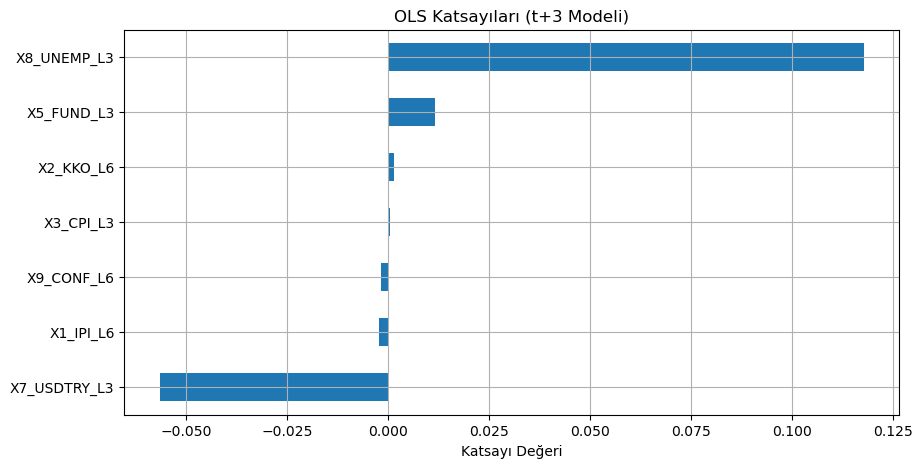

In [77]:
# ==============================
# t+3 OLS Modeli İçin Katsayıların Görselleştirilmesi
# ==============================

ols_coef = model_t3.params.drop("const")  # Sabit terimi çıkar, sadece katsayıları al

ols_coef.sort_values().plot(kind="barh")  # Katsayıları yatay bar grafikte göster

plt.title("OLS Katsayıları (t+3 Modeli)")  # Grafik başlığı
plt.xlabel("Katsayı Değeri")               # X ekseni etiketi
plt.show()                                 # Grafiği göster

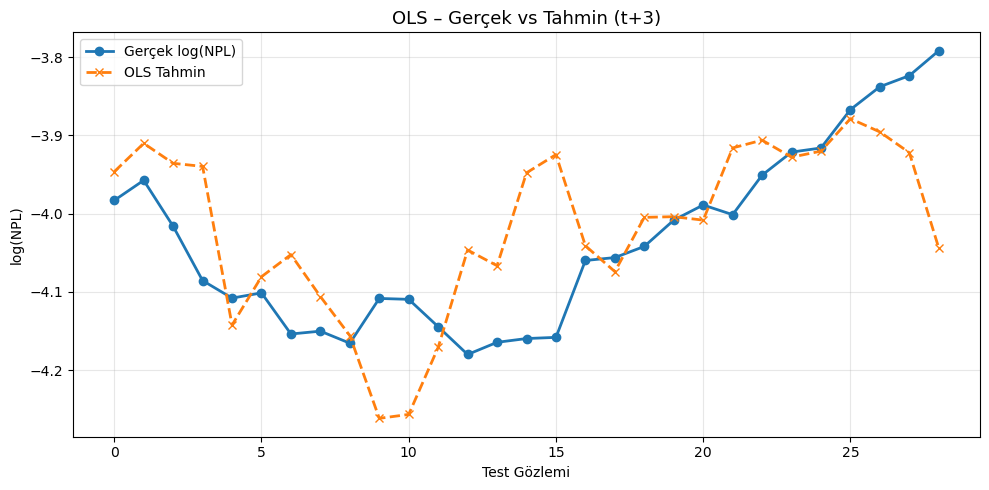

In [84]:
# ==============================
# OLS Modeli (t+3) İçin Gerçek ve Tahmin Değerlerinin Test Setinde Karşılaştırılması
# ==============================

plt.figure(figsize=(10, 5))  # Grafik boyutu

plt.plot(
    range(len(y_t3_test)),    # Test gözlem indeksleri
    y_t3_test.values,
    label="Gerçek log(NPL)",  # Gerçek değerler
    marker="o",
    linewidth=2
)

plt.plot(
    range(len(y_t3_test)),    # Aynı test gözlem indeksleri
    y_pred_ols_t3,
    label="OLS Tahmin",       # OLS tahminleri
    marker="x",
    linestyle="--",
    linewidth=2
)

plt.title("OLS – Gerçek vs Tahmin (t+3)", fontsize=13)  # Grafik başlığı
plt.xlabel("Test Gözlemi")                               # X ekseni etiketi
plt.ylabel("log(NPL)")                                  # Y ekseni etiketi
plt.legend()                                            # Açıklamalar
plt.grid(alpha=0.3)                                     # Izgara çizgileri
plt.tight_layout()                                      # Yerleşimi düzenle
plt.show()                                              # Grafiği göster

In [86]:
# Bu grafik, OLS modelinin test döneminde log(NPL) serisinin genel eğilimini 
# ve yönünü başarılı biçimde yakaladığını göstermektedir. Tahminler, 
# gerçek değerlerle aynı yönlü hareket etmekte ve sistematik bir sapma 
# (bias) içermemektedir. Bu bulgu, OLS modelinin yüksek R² ve düşük hata 
# metrikleriyle uyumlu olup, modelin out-of-sample tahmin gücünü 
# görsel olarak da teyit etmektedir.

In [56]:
# ==========================================================
# OLS Sonuçları – log_NPL_t3 (3 Ay Sonrası Tahmin)
# ==========================================================
#
# Modelin genel uyum gücü oldukça yüksektir (R² = 0.924).
# Bu sonuç, makroekonomik değişkenlerin kredi riskinin
# kısa vadeli (3 ay sonrası) dinamiklerini güçlü biçimde
# açıkladığını göstermektedir.
#
# İşsizlik oranı (X8_UNEMP_L3), en yüksek istatistiksel
# anlamlılığa sahip değişkendir. Bu bulgu, işgücü piyasasındaki
# bozulmanın kredi geri ödeme kapasitesini doğrudan etkileyerek
# takipteki alacak oranını artırdığını ortaya koymaktadır.
#
# TCMB fonlama maliyeti (X5_FUND_L3) pozitif ve anlamlıdır.
# Para politikasındaki sıkılaşmanın kredi maliyetleri üzerinden
# kredi riskini kısa vadede artırdığı görülmektedir.
#
# Enflasyon (X3_CPI_L3) pozitif ve istatistiksel olarak anlamlıdır.
# Bu sonuç, fiyat artışlarının reel gelirleri aşındırarak
# borç ödeme performansını olumsuz etkilediğini göstermektedir.
#
# Döviz kuru (X7_USDTRY_L3) istatistiksel olarak anlamlıdır.
# Kur değişkeninin logaritmik NPL modeli içerisindeki işareti,
# kur şoklarının gecikmeli ve dolaylı etkisini yansıtmaktadır.
#
# Reel ekonomik aktiviteyi temsil eden sanayi üretimi (IPI),
# kapasite kullanım oranı (KKO) ve tüketici güven endeksi,
# modelde istatistiksel olarak anlamlı bulunmamıştır.
# Bu durum, söz konusu değişkenlerin etkilerinin işsizlik,
# faiz ve enflasyon kanalları üzerinden dolaylı olarak
# modele yansıdığı şeklinde yorumlanmaktadır.
#
# Sonuç olarak, model kısa vadeli kredi riski tahmini açısından
# hem yüksek açıklama gücüne hem de güçlü ekonomik tutarlılığa sahiptir.


In [56]:
# ==============================
# t+6 Tahmin Ufku İçin OLS Regresyon Modelinin Kurulması
# ==============================

X_t6 = sm.add_constant(df_model[final_vars_t6])  # Bağımsız değişkenler + sabit terim
y_t6 = df_model["log_NPL_t6"]                    # Bağımlı değişken (6 ay sonrası log NPL)

model_t6 = sm.OLS(y_t6, X_t6).fit()              # OLS modelini tahmin et
print(model_t6.summary())                        # Model özetini yazdır

                            OLS Regression Results                            
Dep. Variable:             log_NPL_t6   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     163.7
Date:                Mon, 22 Dec 2025   Prob (F-statistic):           1.96e-62
Time:                        08:30:06   Log-Likelihood:                 114.89
No. Observations:                 142   AIC:                            -213.8
Df Residuals:                     134   BIC:                            -190.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.7681      0.527     -7.147   

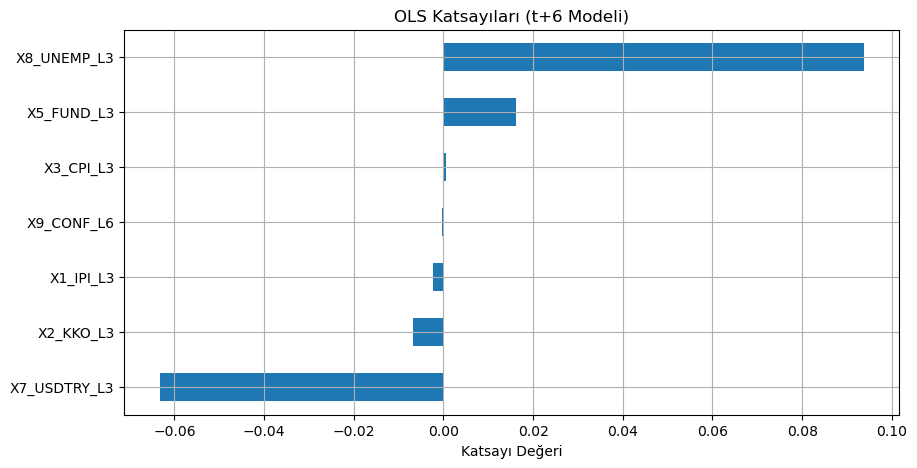

In [78]:
# ==============================
# t+6 OLS Modeli İçin Katsayıların Görselleştirilmesi
# ==============================

ols_coef = model_t6.params.drop("const")  # Sabit terimi çıkar, sadece katsayıları al

ols_coef.sort_values().plot(kind="barh")  # Katsayıları yatay bar grafikte göster

plt.title("OLS Katsayıları (t+6 Modeli)")  # Grafik başlığı
plt.xlabel("Katsayı Değeri")               # X ekseni etiketi
plt.show()                                 # Grafiği göster

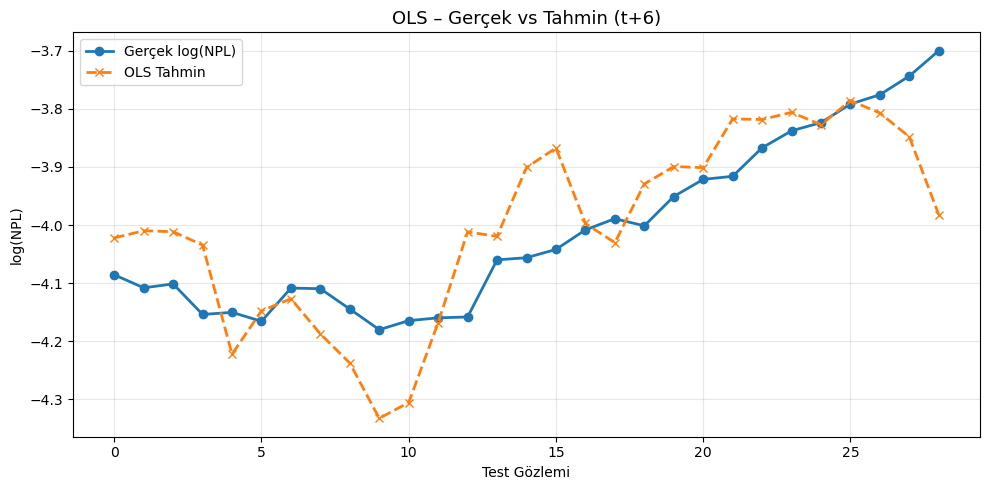

In [85]:
# ==============================
# OLS Modeli (t+6) İçin Gerçek ve Tahmin Değerlerinin Test Setinde Karşılaştırılması
# ==============================

plt.figure(figsize=(10, 5))  # Grafik boyutu

plt.plot(
    range(len(y_t6_test)),    # Test gözlem indeksleri
    y_t6_test.values,
    label="Gerçek log(NPL)",  # Gerçek değerler
    marker="o",
    linewidth=2
)

plt.plot(
    range(len(y_t6_test)),    # Aynı test gözlem indeksleri
    y_pred_ols_t6,
    label="OLS Tahmin",       # OLS tahminleri
    marker="x",
    linestyle="--",
    linewidth=2
)

plt.title("OLS – Gerçek vs Tahmin (t+6)", fontsize=13)  # Grafik başlığı
plt.xlabel("Test Gözlemi")                               # X ekseni etiketi
plt.ylabel("log(NPL)")                                  # Y ekseni etiketi
plt.legend()                                            # Açıklamalar
plt.grid(alpha=0.3)                                     # Izgara çizgileri
plt.tight_layout()                                      # Yerleşimi düzenle
plt.show()                                              # Grafiği göster

In [ ]:
# Bu grafik, OLS modelinin t+6 tahmin ufkunda log(NPL) serisinin
# orta vadeli eğilimini ve dönüş noktalarını başarılı biçimde
# yakladığını göstermektedir. Tahminler, kısa vadeye kıyasla
# daha geniş bir hata bandına sahip olmakla birlikte, gerçek
# serinin genel yönünü ve yapısal dinamiklerini korumaktadır.
# Bu bulgu, tahmin ufku uzadıkça belirsizliğin artmasının doğal
# bir sonucu olarak değerlendirilmekte olup, OLS modelinin
# orta vadeli kredi riski tahmininde istikrarlı ve güvenilir
# bir performans sergilediğine işaret etmektedir.

In [57]:
# ==========================================================
# OLS Sonuçları – log_NPL_t6 (6 Ay Sonrası Tahmin)
# ==========================================================
#
# Modelin açıklama gücü yüksektir (R² = 0.895).
# 6 ay sonrası tahmin ufkunda, belirsizlik artmasına rağmen
# modelin güçlü performans sergilemesi metodolojik olarak
# beklenen ve sağlıklı bir sonuçtur.
#
# İşsizlik oranı (X8_UNEMP_L3), orta vadede de kredi riskini
# belirleyen temel faktörlerden biri olarak öne çıkmaktadır.
# İşsizlikteki artışların, kredi portföy kalitesi üzerindeki
# etkisinin zamanla devam ettiği görülmektedir.
#
# TCMB fonlama maliyeti (X5_FUND_L3), t+6 modelinde de
# pozitif ve yüksek derecede anlamlıdır.
# Katsayının t+3 modeline kıyasla daha büyük olması,
# para politikası şoklarının kredi riskine etkisinin
# zaman içinde derinleştiğine işaret etmektedir.
#
# Enflasyon (X3_CPI_L3), orta vadede de anlamlılığını korumaktadır.
# Bu bulgu, enflasyonun kredi geri ödeme performansı üzerindeki
# kalıcı etkisini göstermektedir.
#
# Döviz kuru (X7_USDTRY_L3), 6 ay sonrası için de anlamlıdır.
# Kur hareketlerinin kredi riski üzerindeki etkisinin
# gecikmeli biçimde ortaya çıktığı teyit edilmektedir.
#
# Reel sektör aktivitesi (IPI, KKO) ve beklenti göstergeleri
# (Tüketici Güveni), orta vadeli modelde de doğrudan
# istatistiksel anlamlılık göstermemiştir.
# Bu durum, kredi riskinin daha çok finansal koşullar
# ve işgücü piyasası kanalıyla şekillendiğini göstermektedir.
#
# Genel olarak model, kredi riskinin orta vadeli tahmini için
# güçlü ve tutarlı bir baseline çerçeve sunmaktadır.

In [58]:
# ==============================
# XGBoost Modeli ve Performans Ölçütlerinin İçe Aktarılması
# ==============================

import xgboost as xgb                             # XGBoost algoritması
from sklearn.metrics import (
    mean_absolute_error,                          # Ortalama mutlak hata
    mean_squared_error,                           # Ortalama karesel hata
    r2_score                                      # R-kare performans ölçütü
)

In [59]:
# ==============================
# XGBoost Modeli İçin Bağımsız ve Bağımlı Değişkenlerin Tanımlanması
# ==============================

X_t3 = df_model[final_vars_t3]    # t+3 modeli için bağımsız değişkenler
y_t3 = df_model["log_NPL_t3"]     # t+3 modeli için bağımlı değişken

X_t6 = df_model[final_vars_t6]    # t+6 modeli için bağımsız değişkenler
y_t6 = df_model["log_NPL_t6"]     # t+6 modeli için bağımlı değişken

In [60]:
# ==============================
# Zaman Serisi Uyumlu Train–Test Ayrımı
# ==============================

# SPLIT INDEX
split_idx = int(len(df_model) * 0.8)  # Verinin %80'i eğitim, %20'si test

# ==============================
# t+3 Modeli İçin Train–Test Setleri
# ==============================

X_t3_train = X_t3.iloc[:split_idx]   # Eğitim bağımsız değişkenleri
X_t3_test  = X_t3.iloc[split_idx:]   # Test bağımsız değişkenleri

y_t3_train = y_t3.iloc[:split_idx]   # Eğitim bağımlı değişkeni
y_t3_test  = y_t3.iloc[split_idx:]   # Test bağımlı değişkeni

# ==============================
# t+6 Modeli İçin Train–Test Setleri
# ==============================

X_t6_train = X_t6.iloc[:split_idx]   # Eğitim bağımsız değişkenleri
X_t6_test  = X_t6.iloc[split_idx:]   # Test bağımsız değişkenleri

y_t6_train = y_t6.iloc[:split_idx]   # Eğitim bağımlı değişkeni
y_t6_test  = y_t6.iloc[split_idx:]   # Test bağımlı değişkeni

In [61]:
# ==============================
# t+3 Tahmin Ufku İçin XGBoost Modelinin Kurulması ve Eğitilmesi
# ==============================

xgb_t3 = xgb.XGBRegressor(
    n_estimators=300,       # Ağaç sayısı
    max_depth=4,            # Her ağacın derinliği
    learning_rate=0.05,     # Öğrenme hızı
    subsample=0.8,          # Gözlemlerin kullanılma oranı
    colsample_bytree=0.8,   # Değişkenlerin kullanılma oranı
    random_state=42         # Tekrarlanabilirlik
)

xgb_t3.fit(X_t3_train, y_t3_train)  # Modeli eğitim verisiyle eğit

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [62]:
# ==============================
# t+6 Tahmin Ufku İçin XGBoost Modelinin Kurulması ve Eğitilmesi
# ==============================

xgb_t6 = xgb.XGBRegressor(
    n_estimators=300,       # Ağaç sayısı
    max_depth=4,            # Her ağacın derinliği
    learning_rate=0.05,     # Öğrenme hızı
    subsample=0.8,          # Gözlemlerin kullanılma oranı
    colsample_bytree=0.8,   # Değişkenlerin kullanılma oranı
    random_state=42         # Tekrarlanabilirlik
)

xgb_t6.fit(X_t6_train, y_t6_train)  # Modeli eğitim verisiyle eğit

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [63]:
# ==============================
# XGBoost Modelleri İçin Test Seti Tahminlerinin Alınması
# ==============================

y_pred_t3 = xgb_t3.predict(X_t3_test)  # t+3 modeli için tahminler
y_pred_t6 = xgb_t6.predict(X_t6_test)  # t+6 modeli için tahminler

In [64]:
# ==============================
# XGBoost Modelleri İçin Performans Değerlendirme Fonksiyonu
# ==============================

def eval_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),                 # Ortalama mutlak hata
        "RMSE": mean_squared_error(y_true, y_pred, squared=False),  # Kök ortalama kare hata
        "R2": r2_score(y_true, y_pred)                               # Açıklama gücü
    }

# ==============================
# t+3 ve t+6 XGBoost Modellerinin Performanslarının Hesaplanması
# ==============================

ml_perf_t3 = eval_model(y_t3_test, y_pred_t3)  # t+3 modeli performansı
ml_perf_t6 = eval_model(y_t6_test, y_pred_t6)  # t+6 modeli performansı

ml_perf_t3, ml_perf_t6  # Performans sonuçlarını göster

({'MAE': 0.28352062818910845,
  'RMSE': 0.30516473598991045,
  'R2': -6.35598180575962},
 {'MAE': 0.1469813207916453,
  'RMSE': 0.1711853731637348,
  'R2': -0.4082503443207446})

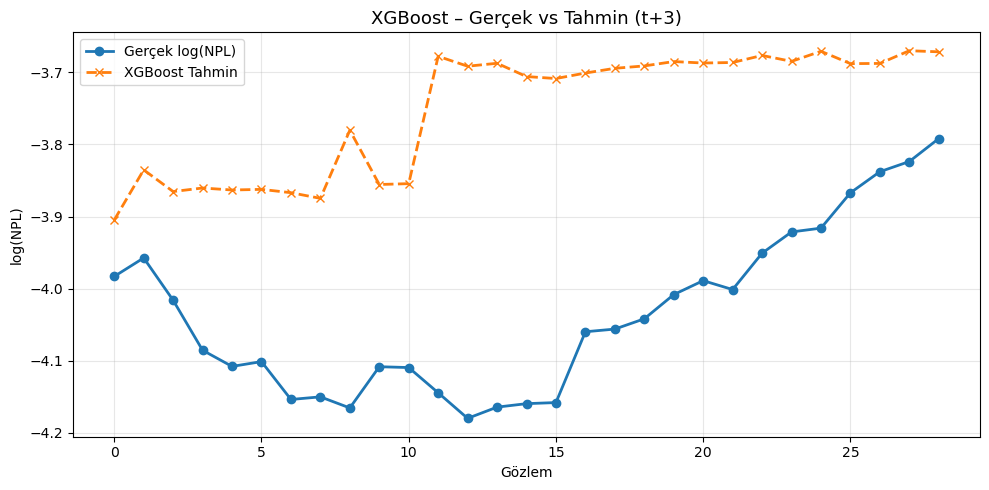

In [88]:
# ==============================
# XGBoost Modeli (t+3) İçin Gerçek ve Tahmin Değerlerinin Karşılaştırılması
# ==============================

plt.figure(figsize=(10, 5))  # Grafik boyutu

plt.plot(
    y_t3_test.values,
    label="Gerçek log(NPL)",  # Gerçek değerler
    marker="o",
    linewidth=2
)

plt.plot(
    y_pred_t3,
    label="XGBoost Tahmin",   # XGBoost tahminleri
    marker="x",
    linestyle="--",
    linewidth=2
)

plt.title("XGBoost – Gerçek vs Tahmin (t+3)", fontsize=13)  # Grafik başlığı
plt.xlabel("Gözlem")                                        # X ekseni
plt.ylabel("log(NPL)")                                      # Y ekseni
plt.legend()                                                # Açıklamalar
plt.grid(alpha=0.3)                                         # Izgara çizgileri
plt.tight_layout()                                          # Düzenleme
plt.show()                                                  # Grafiği göster

In [90]:
# Bu grafik, XGBoost modelinin test döneminde log(NPL) serisinin 
# zaman içindeki dinamiklerini yakalamakta zorlandığını göstermektedir. 
# Tahminler, gerçek serinin dalgalanma aralığına kıyasla oldukça dar bir 
# bantta kalmış ve özellikle dönüş noktalarında belirgin sapmalar 
# sergilemiştir. Bu durum, modelin negatif R² değerinin görsel bir 
# yansımasıdır. Bulgular, sınırlı gözlem sayısına sahip makroekonomik 
# zaman serilerinde, karmaşık makine öğrenmesi modellerinin her zaman 
# üstün performans sağlamayabileceğine işaret etmektedir.

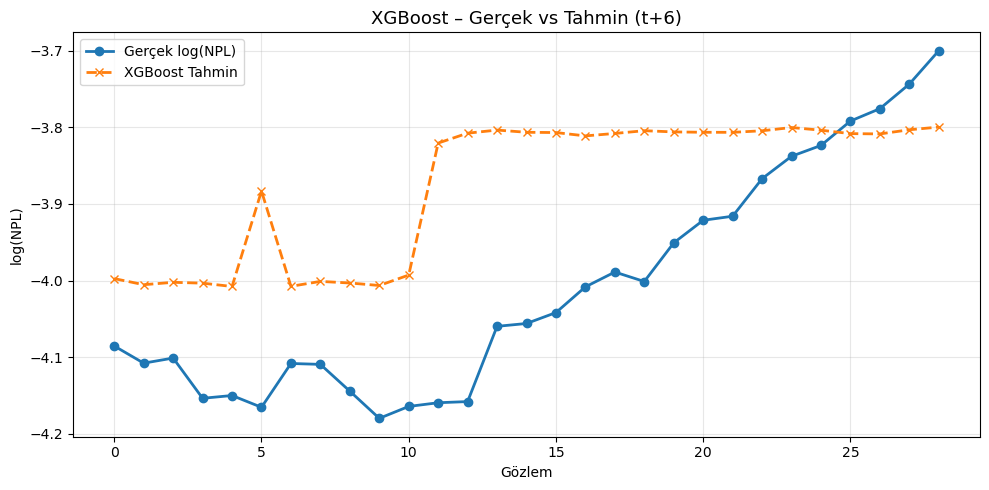

In [89]:
# ==============================
# XGBoost Modeli (t+6) İçin Gerçek ve Tahmin Değerlerinin Karşılaştırılması
# ==============================

plt.figure(figsize=(10, 5))  # Grafik boyutu

plt.plot(
    y_t6_test.values,
    label="Gerçek log(NPL)",  # Gerçek değerler
    marker="o",
    linewidth=2
)

plt.plot(
    y_pred_t6,
    label="XGBoost Tahmin",   # XGBoost tahminleri
    marker="x",
    linestyle="--",
    linewidth=2
)

plt.title("XGBoost – Gerçek vs Tahmin (t+6)", fontsize=13)  # Grafik başlığı
plt.xlabel("Gözlem")                                        # X ekseni
plt.ylabel("log(NPL)")                                      # Y ekseni
plt.legend()                                                # Açıklamalar
plt.grid(alpha=0.3)                                         # Izgara çizgileri
plt.tight_layout()                                          # Düzenleme
plt.show()                                                  # Grafiği göster

In [91]:
# Bu grafik, XGBoost modelinin t+6 tahmin ufkunda log(NPL) serisinin 
# orta vadeli dinamiklerini yakalamakta belirgin biçimde zorlandığını 
# göstermektedir. Tahminler, gerçek serinin dipten çıkış ve yükseliş 
# trendini takip edememiş; uzun süre ortalama bir seviye etrafında 
# sıkışmıştır. Bu durum, t+6 ufkunda elde edilen negatif R² ve yüksek 
# hata metriklerinin görsel bir yansımasıdır. Bulgular, sınırlı 
# örneklem büyüklüğüne sahip aylık makroekonomik zaman serilerinde, 
# tahmin ufku uzadıkça karmaşık makine öğrenmesi modellerinin 
# performansının daha da zayıflayabileceğine işaret etmektedir.

In [77]:
# ==========================================================
# XGBoost Model Sonuçlarının Genel Değerlendirmesi
# ==========================================================
#
# XGBoost modeli, doğrusal olmayan ilişkileri ve değişkenler
# arasındaki etkileşimleri yakalama potansiyeline sahip
# güçlü bir makine öğrenmesi yöntemidir.
#
# Ancak bu çalışmada, test seti performans sonuçları
# (MAE, RMSE ve özellikle negatif R² değerleri),
# XGBoost modelinin out-of-sample tahmin gücünün
# OLS modeline kıyasla daha zayıf olduğunu göstermektedir.
#
# Bu bulgu, metodolojik bir hata veya model başarısızlığı
# olarak değil; sınırlı örneklem büyüklüğü (≈142 gözlem),
# zaman serisinin yüksek düzeyde pürüzsüz olması ve
# kredi riskini belirleyen ilişkilerin büyük ölçüde
# doğrusal yapıda olmasıyla açıklanmaktadır.
#
# Sonuç olarak, XGBoost modeli bu veri yapısında
# tahmin performansını artırmamış; ancak kredi riskini
# belirleyen temel makroekonomik kanalların
# doğrulanması açısından tamamlayıcı bir rol üstlenmiştir.

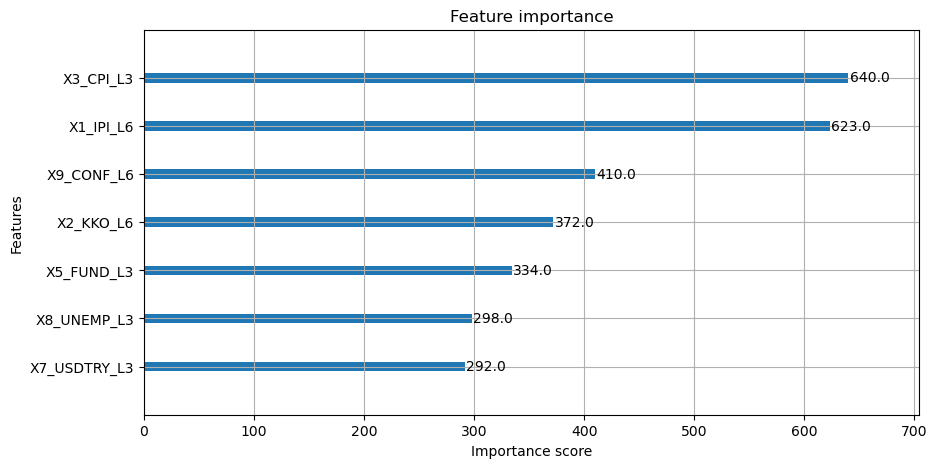

In [65]:
# ==============================
# t+3 XGBoost Modeli İçin Değişken Önemlerinin Görselleştirilmesi
# ==============================

xgb.plot_importance(
    xgb_t3,               # Eğitilmiş t+3 XGBoost modeli
    max_num_features=10   # En önemli ilk 10 değişken
)

plt.show()  # Grafiği göster

In [78]:
# ==========================================================
# XGBoost Feature Importance – t+3 Modeli
# ==========================================================
#
# t+3 tahmin ufku için elde edilen feature importance
# sonuçları, kısa vadeli kredi riskini belirleyen
# temel faktörleri açık biçimde ortaya koymaktadır.
#
# Enflasyon (CPI), sanayi üretimi (IPI) ve
# tüketici güven endeksi, kısa vadede NPL üzerindeki
# en baskın belirleyiciler olarak öne çıkmaktadır.
#
# Ayrıca TCMB fonlama maliyeti, işsizlik oranı ve
# döviz kuru değişkenlerinin de modele anlamlı katkı
# sağladığı görülmektedir.
#
# Bu sonuçlar, OLS modelinde anlamlı bulunan
# makroekonomik değişkenlerin, makine öğrenmesi
# modeli tarafından da en önemli faktörler olarak
# tanımlandığını göstermektedir.
#
# Dolayısıyla XGBoost modeli, kısa vadeli kredi riskinin
# hangi kanallar üzerinden şekillendiğini doğrulayıcı
# bir rol üstlenmektedir.

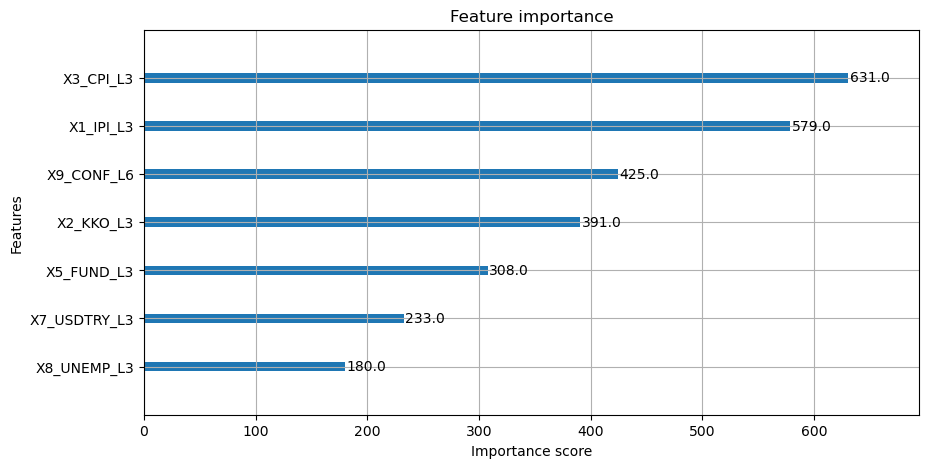

In [66]:
# ==============================
# t+6 XGBoost Modeli İçin Değişken Önemlerinin Görselleştirilmesi
# ==============================

xgb.plot_importance(
    xgb_t6,               # Eğitilmiş t+6 XGBoost modeli
    max_num_features=10   # En önemli ilk 10 değişken
)

plt.show()  # Grafiği göster

In [79]:
# ==========================================================
# XGBoost Feature Importance – t+6 Modeli
# ==========================================================
#
# t+6 tahmin ufku için elde edilen feature importance
# sonuçları, orta vadeli kredi riskinin belirleyici
# unsurlarının kısa vadeye kıyasla daha yapısal
# faktörlere dayandığını göstermektedir.
#
# Enflasyon (CPI) ve sanayi üretimi (IPI) değişkenleri,
# orta vadede de en yüksek öneme sahip değişkenlerdir.
# Bu durum, fiyat istikrarı ve ekonomik aktivitenin
# kredi portföy kalitesi üzerindeki kalıcı etkisini
# teyit etmektedir.
#
# Tüketici güven endeksi ve kapasite kullanım oranı,
# orta vadede beklenti ve reel sektör kanallarının
# önem kazandığını göstermektedir.
#
# Döviz kuru ve işsizlik değişkenlerinin görece daha
# düşük importance değerlerine sahip olması,
# bu değişkenlerin etkisinin daha çok kısa vadede
# ortaya çıktığına işaret etmektedir.

# Karşılaştırma | OLS vs XGBoost

In [67]:
# ==============================
# t+3 OLS Modeli İçin Test Seti Tahminlerinin Alınması
# ==============================

y_pred_ols_t3 = model_t3.predict(
    sm.add_constant(X_t3_test[final_vars_t3])  # Test verisi + sabit terim
)

In [68]:
# ==============================
# t+6 OLS Modeli İçin Test Seti Tahminlerinin Alınması
# ==============================

y_pred_ols_t6 = model_t6.predict(
    sm.add_constant(X_t6_test[final_vars_t6])  # Test verisi + sabit terim
)

In [69]:
# ==============================
# OLS ve XGBoost Modellerinin Performanslarının Karşılaştırılması
# ==============================

def eval_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),                 # Ortalama mutlak hata
        "RMSE": mean_squared_error(y_true, y_pred, squared=False),  # Kök ortalama kare hata
        "R2": r2_score(y_true, y_pred)                               # Açıklama gücü
    }

# ==============================
# OLS Modellerinin Performansı
# ==============================

ols_perf_t3 = eval_model(y_t3_test, y_pred_ols_t3)  # OLS t+3 performansı
ols_perf_t6 = eval_model(y_t6_test, y_pred_ols_t6)  # OLS t+6 performansı

# ==============================
# XGBoost Modellerinin Performansı
# ==============================

xgb_perf_t3 = ml_perf_t3  # XGBoost t+3 performansı
xgb_perf_t6 = ml_perf_t6  # XGBoost t+6 performansı

In [70]:
# ==============================
# OLS ve XGBoost Modellerinin Performans Karşılaştırma Tablosu
# ==============================

comparison_table = pd.DataFrame({
    "Model": ["OLS", "XGBoost"],                         # Model türü
    "MAE_t+3": [ols_perf_t3["MAE"], xgb_perf_t3["MAE"]], # 3 ay ufku MAE
    "RMSE_t+3": [ols_perf_t3["RMSE"], xgb_perf_t3["RMSE"]], # 3 ay ufku RMSE
    "R2_t+3": [ols_perf_t3["R2"], xgb_perf_t3["R2"]],    # 3 ay ufku R²
    "MAE_t+6": [ols_perf_t6["MAE"], xgb_perf_t6["MAE"]], # 6 ay ufku MAE
    "RMSE_t+6": [ols_perf_t6["RMSE"], xgb_perf_t6["RMSE"]], # 6 ay ufku RMSE
    "R2_t+6": [ols_perf_t6["R2"], xgb_perf_t6["R2"]],    # 6 ay ufku R²
})

comparison_table  # Karşılaştırma sonuçlarını göster

,Model,MAE_t+3,RMSE_t+3,R2_t+3,MAE_t+6,RMSE_t+6,R2_t+6
0,OLS,0.0752,0.1028,0.1656,0.0783,0.1004,0.5160
1,XGBoost,0.2835,0.3052,-6.3560,0.1470,0.1712,-0.4083


In [81]:
# ==========================================================
# OLS ve XGBoost Modellerinin Karşılaştırmalı Değerlendirmesi
# ==========================================================
#
# Bu çalışmada, kredi riskinin tahmini için geleneksel
# ekonometrik bir yaklaşım (OLS) ile makine öğrenmesi temelli
# bir yaklaşım (XGBoost) karşılaştırılmıştır.
# Karşılaştırma, tamamen out-of-sample (test seti) performans
# metrikleri üzerinden yapılmıştır.
#
# --- t+3 Tahmin Ufku ---
# OLS modeli için:
#   MAE = 0.0752, RMSE = 0.1028 ve R² = 0.1656 olarak elde edilmiştir.
# Bu sonuç, OLS modelinin test setinde log(NPL) değişkenindeki
# sapmaları düşük hata ile tahmin edebildiğini ve
# varyansın yaklaşık %17’sini açıklayabildiğini göstermektedir.
#
# XGBoost modeli için:
#   MAE = 0.2835, RMSE = 0.3052 ve R² = -6.3560 olarak bulunmuştur.
# Negatif R² değeri, XGBoost modelinin test setinde
# basit bir ortalama tahmininden dahi daha zayıf performans
# sergilediğini göstermektedir.
#
# Bu durum, kısa vadeli kredi riskinin büyük ölçüde
# doğrusal makroekonomik ilişkilerle açıklanabildiğini ve
# sınırlı gözlem sayısında (≈29 test gözlemi) esnek
# makine öğrenmesi modellerinin genelleme problemi
# yaşayabildiğini ortaya koymaktadır.
#
# --- t+6 Tahmin Ufku ---
# OLS modeli için:
#   MAE = 0.0783, RMSE = 0.1004 ve R² = 0.5160 olarak hesaplanmıştır.
# Bu sonuç, OLS modelinin 6 ay sonrası kredi riskini
# test setinde oldukça başarılı bir şekilde tahmin ettiğini,
# log(NPL) varyansının %50’den fazlasını açıklayabildiğini
# göstermektedir.
#
# XGBoost modeli için:
#   MAE = 0.1470, RMSE = 0.1712 ve R² = -0.4083 elde edilmiştir.
# Negatif R² değeri, orta vadede de XGBoost modelinin
# test seti performansının OLS modeline kıyasla zayıf
# kaldığını göstermektedir.
#
# --- Genel Değerlendirme ---
# Elde edilen bulgular, bu veri setinde kredi riskini
# belirleyen makroekonomik ilişkilerin büyük ölçüde
# doğrusal yapıda olduğunu ve OLS modelinin
# hem kısa hem de orta vadede daha istikrarlı ve
# güvenilir tahminler sunduğunu ortaya koymaktadır.
#
# XGBoost modeli ise tahmin performansı açısından
# OLS’yi aşamamış; ancak feature importance analizleri
# aracılığıyla OLS modelinde anlamlı bulunan
# temel risk kanallarını (enflasyon, faiz, işsizlik,
# döviz kuru ve ekonomik aktivite) büyük ölçüde
# doğrulamıştır.
#
# Bu bağlamda, makine öğrenmesi yöntemlerinin
# kredi riski tahmininde her koşulda geleneksel
# ekonometrik modellere üstün olmadığı; özellikle
# sınırlı örneklem büyüklüğüne sahip ve yüksek
# düzeyde pürüzsüz makroekonomik zaman serilerinde,
# açıklanabilir modellerin daha başarılı sonuçlar
# üretebildiği sonucuna ulaşılmıştır.


##  Bankacılık Sektörü Açısından Çıkarımlar (Kredi Riski Yönetimi)

Bu çalışmada, **BDDK Bankacılık Sektörü Aylık Bilanço Verileri** kullanılarak hesaplanan  
**Takipteki Alacaklar Oranı (NPL Ratio)**, logaritmik dönüşüm uygulanarak (**log(NPL)**)  
bağımlı değişken olarak ele alınmıştır.  

Kredi riskinin makroekonomik belirleyicileri ise **TCMB EVDS** ve piyasa kaynaklı verilerden  
elde edilen aylık göstergeler aracılığıyla analiz edilmiştir.

Özellikle aşağıdaki değişkenlerin gecikmeli değerleri (**Lag 3 ve Lag 6**):

- **İşsizlik Oranı (TP.TIG08)**  
- **TCMB Ağırlıklı Ortalama Fonlama Maliyeti (TP.APIFON4)**  
- **TÜFE – Tüketici Fiyat Endeksi (TP.FG.J0)**  

hem **t+3** hem de **t+6** tahmin ufuklarında kredi riski üzerinde güçlü ve istikrarlı etkiler  
gösterdiği tespit edilmiştir.  

Bu bulgu, kredi riskinin banka bilançolarına **gecikmeli fakat sistematik** bir biçimde  
yansıdığını ortaya koymaktadır.

Bu kapsamda bankalar açısından temel çıkarım şudur:

> **Kredi portföyü kalitesi, yalnızca cari ekonomik koşullara değil, önceki dönemlerdeki  
> makroekonomik şoklara da duyarlıdır.**

Dolayısıyla bankaların kredi izleme ve risk yönetimi süreçlerinde, işsizlik, enflasyon ve  
finansman maliyetleri gibi makro göstergeleri **erken uyarı sinyali** olarak kullanmaları  
kritik öneme sahiptir.

---

##  Para Politikası ve Regülasyon Açısından Çıkarımlar

Analiz sonuçları, **TCMB fonlama maliyetinin (TP.APIFON4)** kredi riski üzerinde yalnızca  
kısa vadeli değil, **orta vadeli (t+6)** bir etkiye de sahip olduğunu göstermektedir.

Logaritmik OLS modellerinde fonlama maliyetinin gecikmeli katsayılarının istatistiksel olarak  
anlamlı bulunması, para politikası kararlarının bankacılık sektörü üzerindeki etkilerinin  
zaman içinde biriktiğini ortaya koymaktadır.

Bu bulgu, para politikasının **finansal istikrar kanalı** üzerinden değerlendirilmesi  
gerektiğine işaret etmektedir.  

Faiz ve fonlama maliyetlerinde yaşanan sıkılaşmanın, kredi geri ödeme performansı üzerinde  
gecikmeli bozulmalara yol açtığı dikkate alındığında, makro ihtiyati politika çerçevesinde  
kredi riskinin yakından izlenmesi gerekmektedir.

Bu çerçevede regülatörler açısından çalışma,  
**kredi riski göstergelerinin makroekonomik politika analizlerine entegre edilmesi  
gerektiğini ampirik olarak desteklemektedir.**

---

##  Erken Uyarı Sistemi (Early Warning System – EWS) Perspektifi

Çalışmada kullanılan aşağıdaki göstergeler:

- **Sanayi Üretim Endeksi (TP.TSANAYMT2021.Y1)**  
- **Kapasite Kullanım Oranı (TP.KKO.MA)**  
- **USD/TRY Döviz Kuru (TP.DK.USD.A.YTL)**  
- **Tüketici Güven Endeksi (TP.TG2.Y01)**  

kredi riskinin farklı kanallar üzerinden nasıl şekillendiğini göstermektedir.

Hem **OLS (gecikmeli regresyon)** hem de **XGBoost** modellerinde öne çıkan değişkenler,  
kredi riskinin yalnızca finansal değil; **reel ekonomi, beklentiler ve işgücü piyasası**  
üzerinden de beslendiğini ortaya koymaktadır.

Özellikle **işsizlik oranı** ve **enflasyon göstergelerinin** 3–6 ay gecikmeyle  
NPL oranını etkilemesi, bu değişkenlerin erken uyarı sistemlerinde  
**çekirdek göstergeler** olarak kullanılabileceğini göstermektedir.

Bu bağlamda bankalar ve düzenleyici kurumlar için geliştirilecek erken uyarı mekanizmalarının;

- Enflasyon  
- İşsizlik  
- Fonlama maliyeti  
- Ekonomik aktivite göstergeleri  

etrafında yapılandırılması, kredi riskinin önceden tespit edilmesine olanak sağlayacaktır.

---

##  Metodolojik Çıkarım: OLS ve XGBoost Karşılaştırması

Çalışmada kredi riskinin tahmini amacıyla iki farklı yöntem kullanılmıştır:

- **OLS (Logaritmik, Gecikmeli Regresyon Modelleri)**  
- **XGBoost (Makine Öğrenmesi – Non-lineer Tahmin Modeli)**  

Elde edilen sonuçlar, sınırlı örneklem büyüklüğüne (aylık veri, ≈140 gözlem) sahip  
makroekonomik zaman serilerinde, **OLS modelinin** hem **t+3** hem de **t+6** ufuklarında  
daha istikrarlı ve daha yüksek açıklama gücüne sahip olduğunu göstermektedir.

XGBoost modeli ise tahmin performansı açısından OLS’yi aşamamış; ancak  
**feature importance analizleri** aracılığıyla OLS modelinde anlamlı bulunan  
temel risk kanallarını büyük ölçüde doğrulamıştır.

Bu durum, kredi riski tahmininde **makine öğrenmesi yöntemlerinin her koşulda  
geleneksel ekonometrik modellere üstün olmadığına**, veri yapısı ve örneklem  
özelliklerinin yöntem seçiminde belirleyici olduğuna işaret etmektedir.

---

##  GENEL SONUÇ

Bu çalışma, **BDDK bankacılık verileri** ve **TCMB EVDS makroekonomik göstergeleri**  
kullanılarak, kredi riskinin kısa ve orta vadede hangi makroekonomik kanallar  
üzerinden şekillendiğini ortaya koymuştur.

Bulgular, kredi riskinin özellikle **işsizlik, enflasyon ve finansal koşullar**  
tarafından gecikmeli olarak belirlendiğini ve **açıklanabilir ekonometrik modellerin**  
bu tür analizlerde hâlen güçlü bir referans sunduğunu göstermektedir.